<a href="https://colab.research.google.com/github/yogeshsinghgit/MLProject1/blob/main/Breast_Cancer_Survival_Prediction_with_Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Survival Prediction with Machine Learning

[Source Link](https://thecleverprogrammer.com/2022/03/08/breast-cancer-survival-prediction-with-machine-learning/)

Build a model to predict whether a patient will survive a deadly disease like breast cancer or not.

[Dataset Link](https://raw.githubusercontent.com/amankharwal/Website-data/master/BRCA.csv)


You have a dataset of over 400 breast cancer patients who underwent surgery for the treatment of breast cancer. Below is the information of all columns in the dataset:

1. Patient_ID: ID of the patient
2. Age: Age of the patient
3. Gender: Gender of the patient
4. Protein1, Protein2, Protein3, Protein4: expression levels
5. Tumor_Stage: Breast cancer stage of the patient
6. Histology: Infiltrating Ductal Carcinoma, Infiltration Lobular Carcinoma, Mucinous Carcinoma
7. ER status: Positive/Negative
8. PR status: Positive/Negative
9. HER2 status: Positive/Negative
10. Surgery_type: Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other
11. DateofSurgery: The date of Surgery
12. DateofLast_Visit: The date of the last visit of the patient
13. Patient_Status: Alive/Dead

# importing starter libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and perform basic EDA and Feature Engineering.

In [47]:
dataset_path  = "https://raw.githubusercontent.com/amankharwal/Website-data/master/BRCA.csv"
data = pd.read_csv(dataset_path)

In [48]:
data.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [49]:
# check for null values...
data.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [50]:
data.shape

(341, 16)

In [51]:
# drop records with null values.
data.dropna(inplace = True)

In [52]:
# basic insight about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float

In [53]:
data.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.725552,-0.027232,0.949557,-0.095104,0.006713
std,12.827374,0.543858,0.906153,0.589027,0.625965
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.350600,0.368840,-0.531360,-0.382240
50%,58.000000,0.005649,0.997130,-0.193040,0.038522
75%,67.000000,0.336260,1.612000,0.251210,0.436250
max,90.000000,1.593600,3.402200,2.193400,1.629900


Breast cancer is mostly found in females, so let’s have a look at the Gender column to see how many females and males are there:

In [54]:
data['Gender'].value_counts()

FEMALE    313
MALE        4
Name: Gender, dtype: int64

Let’s have a look at the stage of tumour of the patients:

In [55]:
data["Tumour_Stage"].value_counts()

II     180
III     77
I       60
Name: Tumour_Stage, dtype: int64

In [56]:
stage = data["Tumour_Stage"].value_counts()
labels = stage.index
quantity = stage.values


In [57]:
quantity

array([180,  77,  60])

In [58]:
labels

Index(['II', 'III', 'I'], dtype='object')

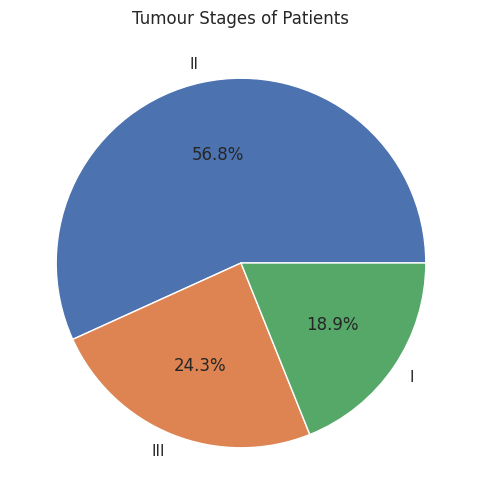

In [59]:
# Create the pie chart
plt.figure(figsize=(6, 6))  # Optional: Set the figure size

stage = data["Tumour_Stage"].value_counts()
transactions = stage.index
quantity = stage.values


plt.pie(quantity, labels=labels, autopct='%1.1f%%')

# Optional: Add a title
plt.title("Tumour Stages of Patients")

# Show the chart
plt.show()


## Most of the patients are in the second stage.

Now let’s have a look at the histology of breast cancer patients. (Histology is a description of a tumour based on how abnormal the cancer cells and tissue look under a microscope and how quickly cancer can grow and spread):



In [60]:
data['Histology'].value_counts()

Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: Histology, dtype: int64

In [61]:
histology_data = data['Histology'].value_counts()
labels = histology_data.index
size =  histology_data.values

In [62]:
labels, size

(Index(['Infiltrating Ductal Carcinoma', 'Infiltrating Lobular Carcinoma',
        'Mucinous Carcinoma'],
       dtype='object'),
 array([224,  81,  12]))

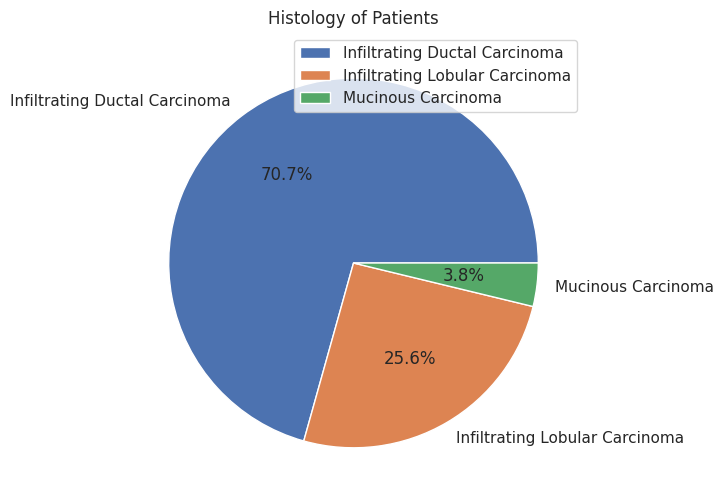

In [63]:
plt.figure(figsize=(10,6))

plt.pie(size, labels= labels,autopct='%1.1f%%')
plt.legend()
plt.title("Histology of Patients")

plt.show()

Now let’s have a look at the values of ER status, PR status, and HER2 status of the patients:

In [64]:
data.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [65]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [66]:
print(data['ER status'].value_counts())


Positive    317
Name: ER status, dtype: int64


In [67]:
data['PR status'].value_counts()


Positive    317
Name: PR status, dtype: int64

In [68]:
data['HER2 status'].value_counts()

Negative    288
Positive     29
Name: HER2 status, dtype: int64

Now let’s have a look at the type of surgeries done to the patients:

In [69]:
surgery_data = data['Surgery_type'].value_counts()

size = surgery_data.values
labels = surgery_data.index

In [70]:
size, labels

(array([97, 89, 66, 65]),
 Index(['Other', 'Modified Radical Mastectomy', 'Lumpectomy',
        'Simple Mastectomy'],
       dtype='object'))

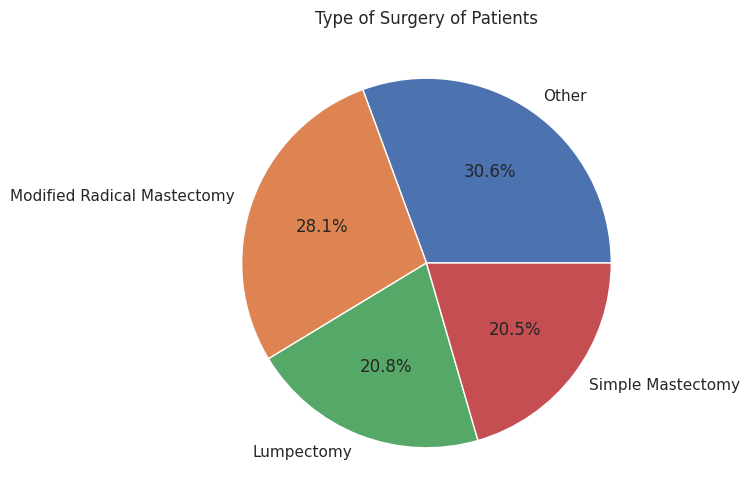

In [71]:
plt.figure(figsize= (6, 6))

plt.pie(size, labels = labels, autopct = '%1.1f%%')

plt.title("Type of Surgery of Patients")

plt.show()

So we explored the data, the dataset has a lot of categorical features. To use this data to train a machine learning model, we need to transform the values of all the categorical columns. Here is how we can transform values of the categorical features:

I'm using ordinal encoding using python map function beacuse the categories in the dataset are ordinal.

In [74]:
data["Tumour_Stage"] = data["Tumour_Stage"].map({"I": 1, "II": 2, "III": 3})

data["Histology"] = data["Histology"].map({"Infiltrating Ductal Carcinoma": 1,
                                           "Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3})

data["ER status"] = data["ER status"].map({"Positive": 1})

data["PR status"] = data["PR status"].map({"Positive": 1})

data["HER2 status"] = data["HER2 status"].map({"Positive": 1, "Negative": 2})

data["Gender"] = data["Gender"].map({"MALE": 0, "FEMALE": 1})

data["Surgery_type"] = data["Surgery_type"].map({"Other": 1, "Modified Radical Mastectomy": 2,
                                                 "Lumpectomy": 3, "Simple Mastectomy": 4})
data.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,1,0.080353,0.42638,0.54715,0.273680,3,1,1,1,2,2,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,1,-0.420320,0.57807,0.61447,-0.031505,2,3,1,1,2,3,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,1,0.213980,1.31140,-0.32747,-0.234260,3,1,1,1,2,1,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,1,0.345090,-0.21147,-0.19304,0.124270,2,1,1,1,2,2,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,1,0.221550,1.90680,0.52045,-0.311990,2,1,1,1,2,1,06-May-17,27-Jun-19,Dead


## Breast Cancer Survival Prediction Model

In [75]:
X = data[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4',
                   'Tumour_Stage', 'Histology', 'ER status', 'PR status',
                   'HER2 status', 'Surgery_type']]

y = data['Patient_Status']

In [77]:
# train-test-split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [78]:
X_train.shape, X_test.shape

((285, 12), (32, 12))

## Create Model

In [79]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

SVC()

In [80]:
# Prediction
# features = [['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']]
features = np.array([[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1, 1, 2, 2,]])
print(model.predict(features))

['Alive']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [82]:
y_pred = model.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix, f1_score

In [84]:
confusion_matrix(y_test, y_pred)

array([[26,  0],
       [ 6,  0]])